<a href="https://colab.research.google.com/github/tahahamdii/Medical-Chatbot-Llama2/blob/main/heart_attacks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_score
import pandas as pd


import warnings
warnings.filterwarnings("ignore")

### **Data Exploration**

In [ ]:
data = pd.read_csv('/content/heart_attack_dataset.csv')

In [ ]:
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [ ]:
data.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [ ]:
data.isnull().sum()


,0
Patient ID,0
Age,0
Sex,0
Cholesterol,0
Blood Pressure,0
Heart Rate,0
Diabetes,0
Family History,0
Smoking,0
Obesity,0


In [ ]:
data.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [ ]:
ctg_data = data[['Sex','Diet','Continent','Country','Hemisphere']]


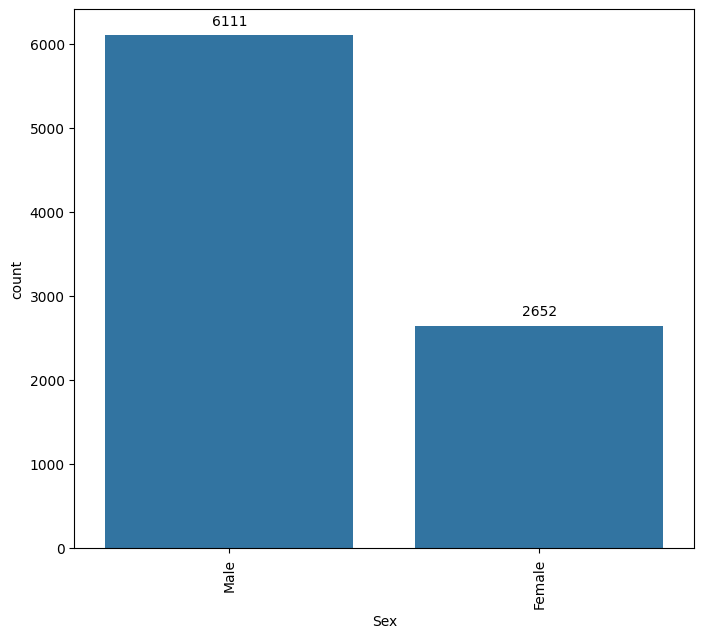

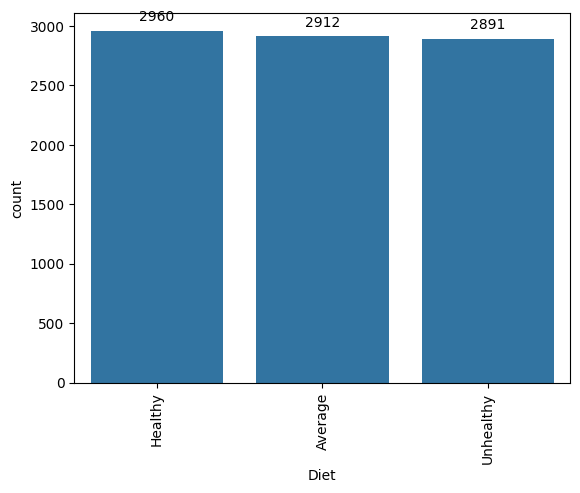

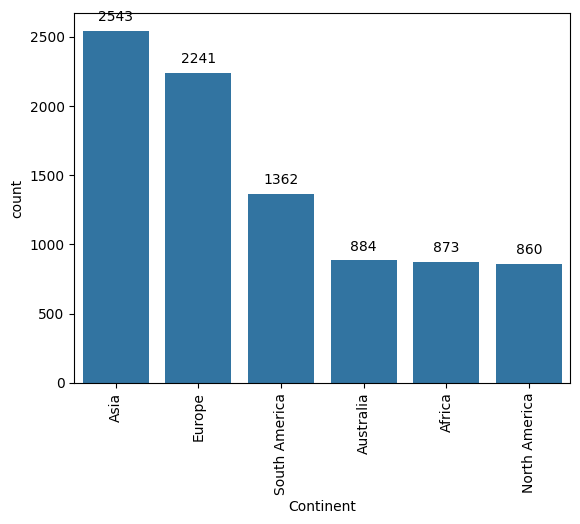

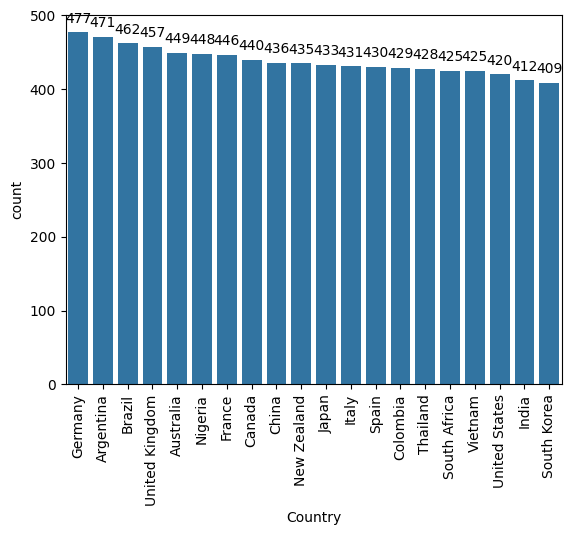

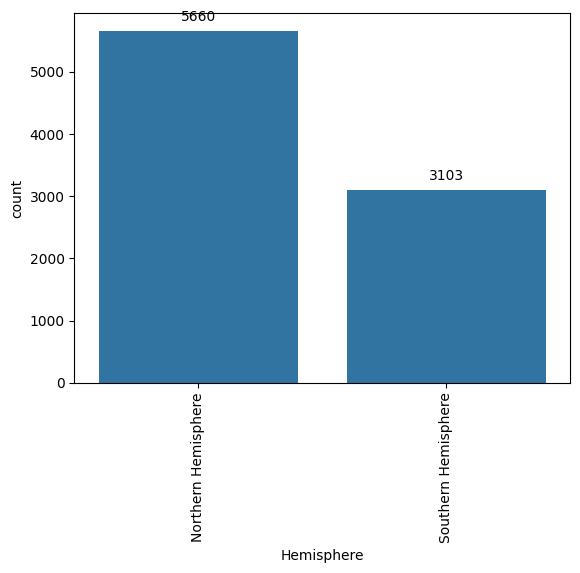

In [ ]:
plt.figure(figsize=(8, 7))
for i in ctg_data.columns:
    ctg_num = ctg_data[i].value_counts()
    chart = sns.barplot(x = ctg_num.index, y = ctg_num)
    for p in chart.patches:
        chart.annotate(format(p.get_height(), '.0f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 10),
                     textcoords = 'offset points',
                     fontsize=10)

    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

<Axes: >

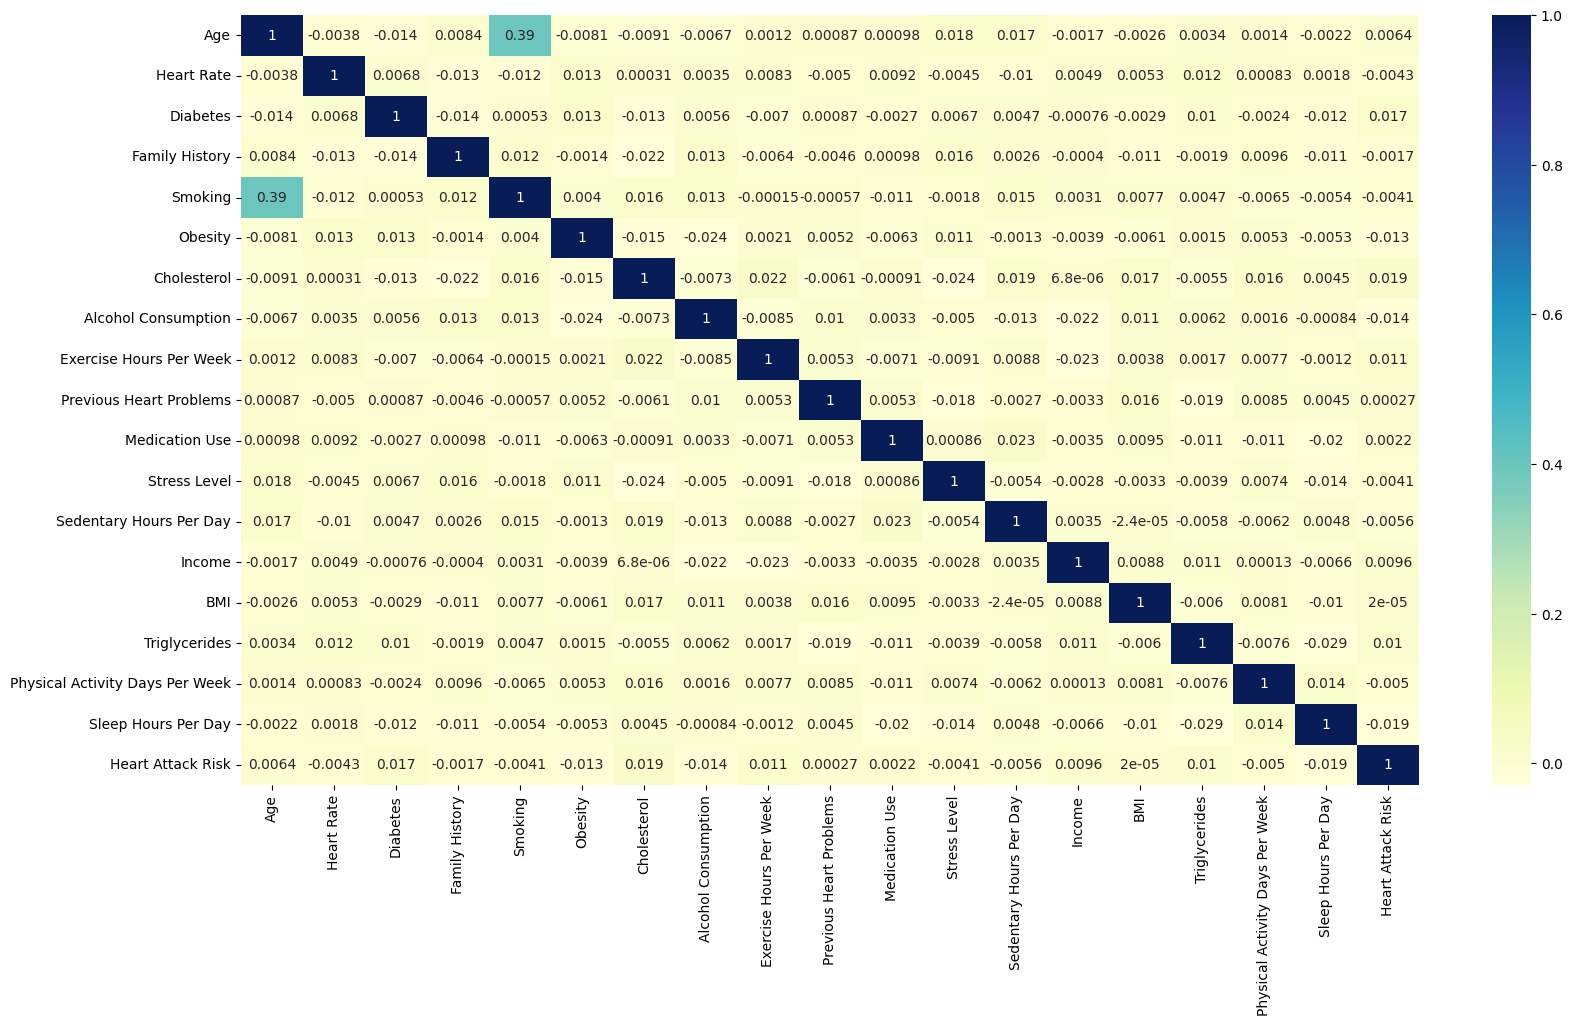

In [ ]:
plt.figure(figsize = (19,10))
sns.heatmap(data[['Age','Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Cholesterol',
                  'Alcohol Consumption', 'Exercise Hours Per Week', 'Previous Heart Problems',
                  'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI',
                  'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day',
                  'Heart Attack Risk']].corr(), cmap="YlGnBu", annot=True)

Heart Attack risk has highest correlation with Diabetes, Cholestrol and Exercise Hours Per Weak
Heart attack Risk is not much dependent on Sedentary Hours Per Day
Alcohol Consumption has no stronger link with Heart Attack Risk
Smoking is not a major cause of Heart Attack

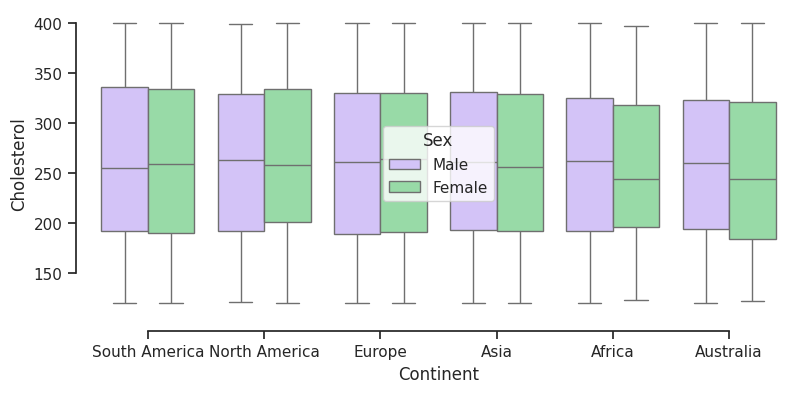

In [ ]:
#Continents w.r.t Cholestrol Level range
plt.figure(figsize= (9,4))
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="Continent", y='Cholesterol', hue="Sex",
             palette=["m", "g"],
            data=data)
sns.despine(offset=10, trim=True) #hue="smoker",

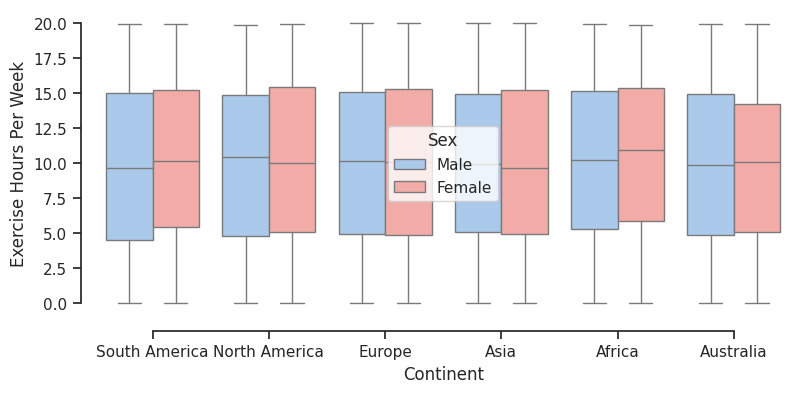

In [ ]:
#Continents w.r.t Exercise Hours Per Week range
plt.figure(figsize= (9,4))
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(x="Continent", y='Exercise Hours Per Week',  hue="Sex",
             palette=["b", "r"],
            data=data)
sns.despine(offset=10, trim=True) #hue="smoker",

In [ ]:
data.groupby('Country')[['BMI']].mean().sort_values(by = "BMI")
#val.sort_values(by = "BMI")

,BMI
Country,
Japan,28.291157
France,28.555747
Vietnam,28.668896
Spain,28.712143
Colombia,28.714773
New Zealand,28.766462
Argentina,28.794898
Thailand,28.819812
China,28.861312


In [ ]:
data.head()


,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [ ]:
"""Setting column 'Blood Pressure'
Splitting Between Diastolic and Systolic Blood Pressure"""

data['BP_Systolic'] = data['Blood Pressure'].apply(lambda x: x.split('/')[0])
data['BP_Diastolic'] = data['Blood Pressure'].apply(lambda x: x.split('/')[1])

In [ ]:
"""Ordinal Encoding for diet: 1:healthy, 2:average, 3:unhealthy"""
#using Map Function
ordinal_map = {'Healthy':2,'Average':1,'Unhealthy':0}
data['Diet'] = data['Diet'].map(ordinal_map)

In [ ]:
"""One_hot encoding for 'Sex(Gender)' """
data = pd.get_dummies(data, columns = ['Sex'])

In [ ]:
data.dtypes

,0
Patient ID,object
Age,int64
Cholesterol,int64
Blood Pressure,object
Heart Rate,int64
Diabetes,int64
Family History,int64
Smoking,int64
Obesity,int64
Alcohol Consumption,int64


In [ ]:
"""Converting 'Object' and 'Boolean' Datatype into int"""
cat_columns = ['Sex_Female','Sex_Male','BP_Systolic','BP_Diastolic']
data[cat_columns] = data[cat_columns].astype(int)

In [1]:
X = data[['Age', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History',
          'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week',
          'Diet', 'Previous Heart Problems', 'Medication Use', 'Stress Level',
          'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
          'Physical Activity Days Per Week', 'Sleep Hours Per Day',
          'BP_Systolic', 'BP_Diastolic','Sex_Female', 'Sex_Male']]

y=data['Heart Attack Risk'].values

NameError: name 'data' is not defined

In [ ]:
X.head()


In [ ]:
#Splitting Data
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y = train_test_split(X,y, test_size=0.2 , random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

In [ ]:
#Applying and Checking Accuracy and Precision of different Classification Models
models = {'Logistic_Regression':LogisticRegression(),
          'Random_Forest':RandomForestClassifier(),
         'XGBoost':xgb.XGBClassifier(),
          'SVM':SVC(kernel = 'rbf'),
          'KNN':KNeighborsClassifier(n_neighbors = 10),
          'Naive_Bayes':GaussianNB()}

In [ ]:
for i in models:
    obj = models[i]
    obj.fit(train_X, train_y)
    obj_pred = obj.predict(test_X)
    accuracy = accuracy_score(test_y,obj_pred)
    precision = precision_score(test_y,obj_pred,zero_division=1)
    print('Accuracy of '+i+': ',accuracy)
    print('Precision of '+i+': ',precision)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(train_X, train_y)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rfc, X=train_X, y=train_y, cv=10)

In [ ]:
print(accuracies)
accuracies.mean()